In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data

relationship_df = pd.read_csv('20th_century_country_relationships.csv', index_col = 0)

In [3]:
relationship_df

,Country2,Weight
Country1,,
Germany,Russia,120
France,Germany,91
Germany,Italy,78
Germany,United Kingdom,66
France,Russia,64
...,...,...
Greece,Latvia,2
Greece,Lithuania,2
Belarus,Japan,2


In [4]:
df_edges = relationship_df.reset_index()
print(df_edges.head())

  Country1        Country2  Weight
0  Germany          Russia     120
1   France         Germany      91
2  Germany           Italy      78
3  Germany  United Kingdom      66
4   France          Russia      64


In [5]:
G = nx.from_pandas_edgelist(
   df_edges, 
    source="Country1", 
    target="Country2", 
    edge_attr="Weight", 
    create_using=nx.Graph()
)

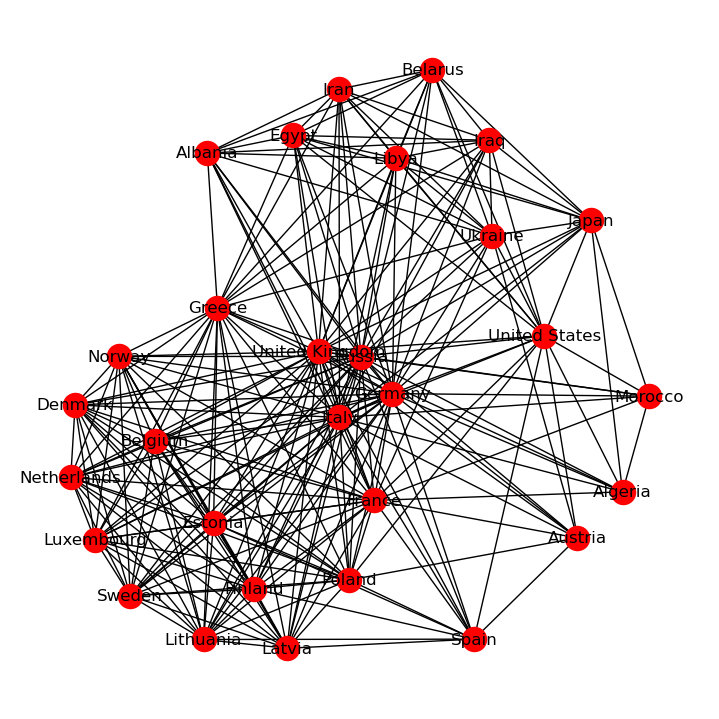

In [6]:
# plotting country connections in networkx

h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [7]:
h.savefig('networkx_countries.png')

In [8]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("pyvis_countries.html")

pyvis_countries.html


In [9]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [10]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [11]:
new_com = coms.to_node_community_map()

In [12]:
new_com

defaultdict(list,
            {'Germany': [0],
             'Russia': [0],
             'United Kingdom': [0],
             'United States': [0],
             'Ukraine': [0],
             'Austria': [0],
             'Egypt': [0],
             'Japan': [0],
             'Libya': [0],
             'Albania': [0],
             'Belarus': [0],
             'Algeria': [0],
             'Morocco': [0],
             'Iraq': [0],
             'Iran': [0],
             'France': [1],
             'Italy': [1],
             'Poland': [1],
             'Greece': [1],
             'Norway': [1],
             'Denmark': [1],
             'Belgium': [1],
             'Estonia': [1],
             'Netherlands': [1],
             'Finland': [1],
             'Luxembourg': [1],
             'Sweden': [1],
             'Lithuania': [1],
             'Latvia': [1],
             'Spain': [1]})

In [13]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [14]:
dict_com

{'Germany': 0,
 'Russia': 0,
 'United Kingdom': 0,
 'United States': 0,
 'Ukraine': 0,
 'Austria': 0,
 'Egypt': 0,
 'Japan': 0,
 'Libya': 0,
 'Albania': 0,
 'Belarus': 0,
 'Algeria': 0,
 'Morocco': 0,
 'Iraq': 0,
 'Iran': 0,
 'France': 1,
 'Italy': 1,
 'Poland': 1,
 'Greece': 1,
 'Norway': 1,
 'Denmark': 1,
 'Belgium': 1,
 'Estonia': 1,
 'Netherlands': 1,
 'Finland': 1,
 'Luxembourg': 1,
 'Sweden': 1,
 'Lithuania': 1,
 'Latvia': 1,
 'Spain': 1}

In [16]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

country_communities_leiden.html


### The communities don't make a lot of sense to me they don't seem to follow much of a pattern the only thing I can see is that the yellow group is only european countries while the blue group contains a few european countries but mostly the non european countries.

In [17]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Germany': 1.0,
 'Russia': 1.0,
 'France': 0.7931034482758621,
 'Italy': 0.9310344827586207,
 'United Kingdom': 1.0,
 'United States': 0.5862068965517241,
 'Ukraine': 0.48275862068965514,
 'Austria': 0.3103448275862069,
 'Poland': 0.6551724137931034,
 'Greece': 0.7931034482758621,
 'Egypt': 0.4482758620689655,
 'Norway': 0.5517241379310345,
 'Denmark': 0.5517241379310345,
 'Belgium': 0.5517241379310345,
 'Japan': 0.4482758620689655,
 'Libya': 0.4482758620689655,
 'Estonia': 0.5862068965517241,
 'Albania': 0.41379310344827586,
 'Netherlands': 0.5517241379310345,
 'Finland': 0.5862068965517241,
 'Belarus': 0.41379310344827586,
 'Luxembourg': 0.5517241379310345,
 'Sweden': 0.5517241379310345,
 'Lithuania': 0.5862068965517241,
 'Latvia': 0.5862068965517241,
 'Algeria': 0.27586206896551724,
 'Morocco': 0.27586206896551724,
 'Spain': 0.41379310344827586,
 'Iraq': 0.4482758620689655,
 'Iran': 0.4482758620689655}

In [18]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [19]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

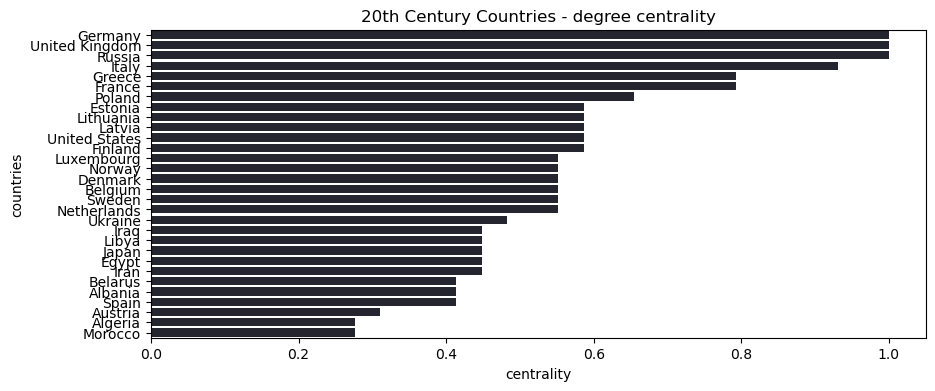

In [20]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century Countries - degree centrality")

In [21]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [22]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

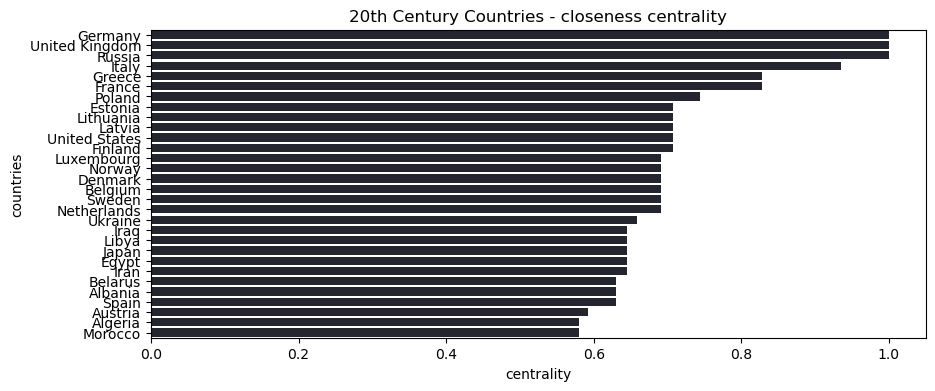

In [23]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century Countries - closeness centrality")

In [24]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [25]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

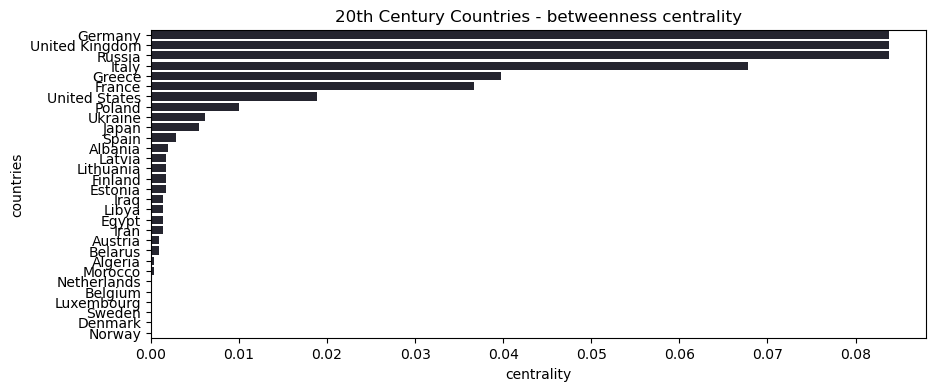

In [26]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century Countries - betweenness centrality")

### The Top 6 are always in the same order mainly because they are the most prominent countries in WW2